In [2]:
#library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
plt.style.use("seaborn")

In [3]:
#for machine learning

import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

from sklearn.naive_bayes import GaussianNB


In [4]:
data = pd.read_csv("Survey Pengguna Handphone2.csv")

In [5]:
data.head()

,pemasukan,pekerjaan,uang kuota,merk,kuota Game,kuota Email,kuota lain,uang lebih baik,panik tagihan,keuangan resah,uang tersisa habis,level
0,Rp 5.000.001 - Rp 10.000.000,PNS / BUMN / Pegawai Pemerintah,Rp 200.001 - Rp 500.000,Samsung,5,3,5,3,3,3,1,very low risk
1,Rp 3.000.001 - Rp 5.000.000,Karyawan Swasta,Rp 50.001 - Rp 100.000,Oppo,2,1,4,4,4,2,4,low risk
2,Rp 3.000.001 - Rp 5.000.000,PNS / BUMN / Pegawai Pemerintah,Rp 50.001 - Rp 100.000,Samsung,1,1,5,2,1,1,5,low risk
3,> Rp 10.000.001,Karyawan Swasta,Rp 50.001 - Rp 100.000,Oppo,2,1,4,3,3,2,1,very low risk
4,Rp 5.000.001 - Rp 10.000.000,PNS / BUMN / Pegawai Pemerintah,Rp 200.001 - Rp 500.000,Samsung,1,5,5,5,1,1,1,very low risk


In [6]:
data.columns

Index(['pemasukan', 'pekerjaan', 'uang kuota', 'merk', 'kuota Game',
       'kuota Email', 'kuota lain', 'uang lebih baik', 'panik tagihan',
       'keuangan resah', 'uang tersisa habis', 'level'],
      dtype='object')

In [7]:
data.shape

(714, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 12 columns):
pemasukan             714 non-null object
pekerjaan             714 non-null object
uang kuota            714 non-null object
merk                  714 non-null object
kuota Game            714 non-null int64
kuota Email           714 non-null int64
kuota lain            714 non-null int64
uang lebih baik       714 non-null int64
panik tagihan         714 non-null int64
keuangan resah        714 non-null int64
uang tersisa habis    714 non-null int64
level                 714 non-null object
dtypes: int64(7), object(5)
memory usage: 67.0+ KB


In [9]:
#check for missing values
data.isnull().any()

pemasukan             False
pekerjaan             False
uang kuota            False
merk                  False
kuota Game            False
kuota Email           False
kuota lain            False
uang lebih baik       False
panik tagihan         False
keuangan resah        False
uang tersisa habis    False
level                 False
dtype: bool

In [10]:
data.isnull().sum()

pemasukan             0
pekerjaan             0
uang kuota            0
merk                  0
kuota Game            0
kuota Email           0
kuota lain            0
uang lebih baik       0
panik tagihan         0
keuangan resah        0
uang tersisa habis    0
level                 0
dtype: int64

In [11]:
#Segregating the numeric and categorical variable names
numeric_var_names = [key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
categorical_var_names = [key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object']]

In [12]:
numeric_var_names

['kuota Game',
 'kuota Email',
 'kuota lain',
 'uang lebih baik',
 'panik tagihan',
 'keuangan resah',
 'uang tersisa habis']

In [13]:
categorical_var_names

['pemasukan', 'pekerjaan', 'uang kuota', 'merk', 'level']

In [14]:
#Evaluating the number of each categorical variables
data['pemasukan'].value_counts()

Rp 5.000.001 - Rp 10.000.000    198
Rp 3.000.001 - Rp 5.000.000     147
> Rp 10.000.001                 110
< Rp 1.000.000                  104
Rp 2.000.001 - Rp 3.000.000      82
Rp 1.000.001 - Rp 2.000.000      73
Name: pemasukan, dtype: int64

In [15]:
data['uang kuota'].value_counts()

Rp 50.001 - Rp 100.000     294
Rp 100.001 - Rp 200.000    213
Rp 200.001 - Rp 500.000     99
0 - Rp 50.000               96
> Rp 500.001                12
Name: uang kuota, dtype: int64

In [16]:
data['merk'].value_counts()

Samsung           223
Xiaomi            171
Oppo               80
iPhone             77
Asus               47
Vivo               44
Selain di atas     20
LG                 11
Nokia              11
Lenovo              9
Huawei              7
Realme              6
SONY                6
Motorola            2
Name: merk, dtype: int64

In [17]:
data['pekerjaan'].value_counts()

Karyawan Swasta                                        227
PNS / BUMN / Pegawai Pemerintah                        130
Pelajar                                                 73
Guru atau dosen                                         70
Ibu Rumah Tangga                                        60
Wiraswasta / Pedagang                                   37
Pekerja Lepas / Freelancer                              29
Pekerja Medis (Dokter / Bidan / Apoteker / Perawat)     25
Tidak bekerja                                           19
Karyawan Honorer                                        15
Peneliti                                                11
Buruh                                                    6
Petani / Pekebun / Peternak                              3
Polisi atau TNI                                          3
Pembantu Rumah Tangga                                    2
Pensiunan                                                2
Investor                                                

In [18]:
#Indicator variable unique types

data['level'].value_counts()

very low risk     308
low risk          147
very high risk    104
medium risk        82
high risk          73
Name: level, dtype: int64

In [19]:
#Categorize categorical variable into number
cat_replace = {'pemasukan': {"< Rp 1.000.000": 1, "Rp 1.000.001 - Rp 2.000.000": 2, "Rp 2.000.001 - Rp 3.000.000": 3,"Rp 3.000.001 - Rp 5.000.000": 4, "Rp 5.000.001 - Rp 10.000.000": 5, "> Rp 10.000.001": 6},
               'uang kuota':{"0 - Rp 50.000": 1, "Rp 50.001 - Rp 100.000": 2, "Rp 100.001 - Rp 200.000" : 3,"Rp 200.001 - Rp 500.000": 4, "> Rp 500.001": 5},              
                'merk':{"Samsung": 13,"Xiaomi": 11,"Oppo": 8,"iPhone": 14,"Asus": 3,"Vivo": 4,"Selain di atas": 1,"LG": 10,                 
                        "Nokia": 9,"Lenovo": 6,"Huawei": 12,"SONY": 7,"Realme": 2,"Motorola": 5},
               'pekerjaan':{"Karyawan Swasta": 16,"PNS / BUMN / Pegawai Pemerintah": 17,"Pelajar": 2,"Guru atau dosen": 15,                                         
                        "Ibu Rumah Tangga": 3,"Wiraswasta / Pedagang": 11,"Pekerja Lepas / Freelancer": 10,                              
                        "Pekerja Medis (Dokter / Bidan / Apoteker / Perawat)": 13,"Tidak bekerja": 1,                                           
                        "Karyawan Honorer": 9,"Peneliti": 14,"Buruh": 8,"Petani / Pekebun / Peternak": 6,                              
                        "Polisi atau TNI": 12,"Pensiunan": 7,"Pembantu Rumah Tangga": 5,"Sopir": 4,"Investor": 18},
               'level':{"very low risk": 1,"low risk": 2,"medium risk": 3,"high risk": 4,"very high risk": 5},
               }

In [20]:
data2 = data.copy()
data2.replace(cat_replace, inplace = True)
data2.head()

,pemasukan,pekerjaan,uang kuota,merk,kuota Game,kuota Email,kuota lain,uang lebih baik,panik tagihan,keuangan resah,uang tersisa habis,level
0,5,17,4,13,5,3,5,3,3,3,1,1
1,4,16,2,8,2,1,4,4,4,2,4,2
2,4,17,2,13,1,1,5,2,1,1,5,2
3,6,16,2,8,2,1,4,3,3,2,1,1
4,5,17,4,13,1,5,5,5,1,1,1,1


In [21]:
#Describe data percentile
data2.describe(percentiles=[.25,0.5,0.75,0.90,0.95])

,pemasukan,pekerjaan,uang kuota,merk,kuota Game,kuota Email,kuota lain,uang lebih baik,panik tagihan,keuangan resah,uang tersisa habis,level
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,3.829132,12.179272,2.491597,10.148459,1.627451,2.364146,3.728291,3.219888,2.309524,2.535014,1.455182,2.324930
std,1.644044,5.649542,0.947759,3.724801,1.049211,1.199183,1.276219,1.254712,1.178700,1.223671,0.916627,1.470904
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,9.000000,2.000000,8.000000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,16.000000,2.000000,11.000000,1.000000,2.000000,4.000000,3.000000,2.000000,3.000000,1.000000,2.000000
75%,5.000000,16.000000,3.000000,13.000000,2.000000,3.000000,5.000000,4.000000,3.000000,3.000000,2.000000,3.000000
90%,6.000000,17.000000,4.000000,14.000000,3.000000,4.000000,5.000000,5.000000,4.000000,4.000000,3.000000,5.000000
95%,6.000000,17.000000,4.000000,14.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.350000,5.000000
max,6.000000,18.000000,5.000000,14.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


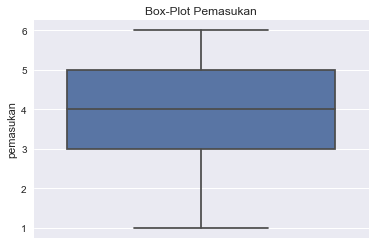

In [22]:
#Visualization Box Plot
sns.boxplot(y = "pemasukan", data = data2)
plt.title("Box-Plot Pemasukan")
plt.show()

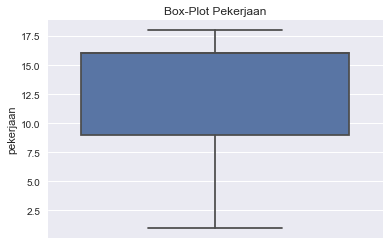

In [23]:
sns.boxplot(y = "pekerjaan", data = data2)
plt.title("Box-Plot Pekerjaan")
plt.show()

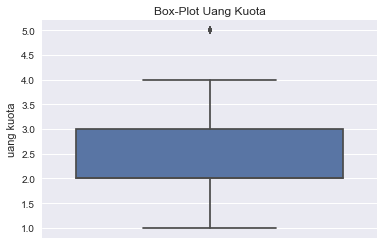

In [24]:
sns.boxplot(y = "uang kuota", data = data2)
plt.title("Box-Plot Uang Kuota")
plt.show()

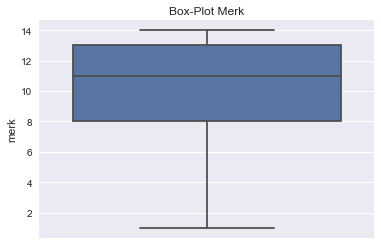

In [25]:
sns.boxplot(y = "merk", data = data2)
plt.title("Box-Plot Merk")
plt.show()

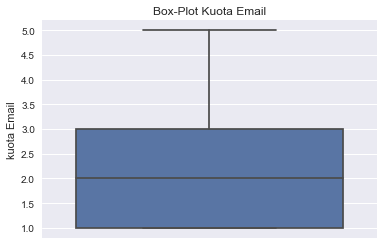

In [26]:
sns.boxplot(y = "kuota Email", data = data2)
plt.title("Box-Plot Kuota Email")
plt.show()

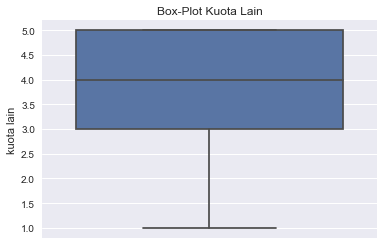

In [27]:
sns.boxplot(y = "kuota lain", data = data2)
plt.title("Box-Plot Kuota Lain")
plt.show()

In [28]:
#mengatasi outlier pada uang kuota
uangkuota_minlimit = data2["uang kuota"].quantile(0.75) + 1.5 * (data2["uang kuota"].quantile(0.75) - data2["uang kuota"].quantile(0.25))
uangkuota_minlimit

4.5

In [30]:
#menghilangkan outlier menggunakan persentil 0.95
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.95))
    
    return(x)

In [31]:
#outlier treatment
data2 = data2.apply(lambda x: outlier_capping(x))

In [32]:
#Correlation Matrix
data2.corr()

,pemasukan,pekerjaan,uang kuota,merk,kuota Game,kuota Email,kuota lain,uang lebih baik,panik tagihan,keuangan resah,uang tersisa habis,level
pemasukan,1.000000,0.566195,0.414661,0.017661,0.000552,0.222970,0.067415,0.093710,-0.177493,-0.220113,-0.032396,-0.979214
pekerjaan,0.566195,1.000000,0.244896,-0.009123,-0.017552,0.194800,0.045239,0.019607,-0.084753,-0.135746,-0.054249,-0.597149
uang kuota,0.414661,0.244896,1.000000,0.026723,0.130714,0.176550,0.183446,0.123230,0.032738,0.002051,0.014192,-0.410343
merk,0.017661,-0.009123,0.026723,1.000000,0.025556,0.007662,0.023250,0.035019,0.017631,-0.042375,-0.023658,-0.006513
kuota Game,0.000552,-0.017552,0.130714,0.025556,1.000000,0.032090,0.098230,0.118700,0.081441,0.081045,0.108165,-0.012060
kuota Email,0.222970,0.194800,0.176550,0.007662,0.032090,1.000000,0.106896,0.106105,0.024334,0.020928,-0.011992,-0.197577
kuota lain,0.067415,0.045239,0.183446,0.023250,0.098230,0.106896,1.000000,0.222172,0.119386,0.103094,0.099462,-0.080664
uang lebih baik,0.093710,0.019607,0.123230,0.035019,0.118700,0.106105,0.222172,1.000000,0.191948,0.172651,0.113749,-0.088924
panik tagihan,-0.177493,-0.084753,0.032738,0.017631,0.081441,0.024334,0.119386,0.191948,1.000000,0.496662,0.187020,0.176506
keuangan resah,-0.220113,-0.135746,0.002051,-0.042375,0.081045,0.020928,0.103094,0.172651,0.496662,1.000000,0.129685,0.210294


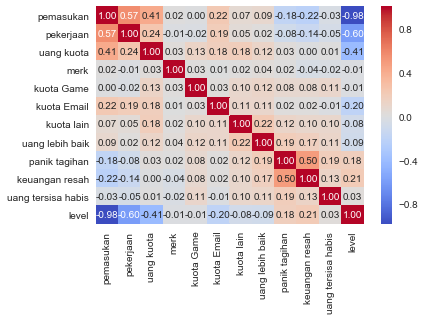

In [33]:
#Visualize the correlation using seaborn heatmap
sns.heatmap(data2.corr(),annot=True,fmt="0.2f",cmap="coolwarm")
plt.show()

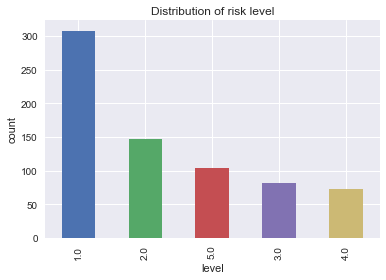

In [34]:
data2['level'].value_counts().plot.bar()
plt.xlabel("level")
plt.ylabel("count")
plt.title("Distribution of risk level")
plt.show()

In [35]:
#percentage of unique types in indicator variable

round(data2['level'].value_counts()/data2.shape[0] * 100,3)

1.0    43.137
2.0    20.588
5.0    14.566
3.0    11.485
4.0    10.224
Name: level, dtype: float64

In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('pemasukan ~ level',
                data=data2).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

               sum_sq     df             F  PR(>F)
level     1847.870187    1.0  16594.592165     0.0
Residual    79.283875  712.0           NaN     NaN


In [ ]:
#With 95% confidence, alpha = 0.05 , df1 =1 ,df2 =712 given F value from the F table is 3.855 
#and the calculated F value is 16594.592165.
#we see that the calculated F value falls in the rejection region that is beyond our confidence level. 
#So we are rejecting the Null Hypothesis.
#To Conclude, as the null hypothesis is rejected that means 
#variance exists between the groups which state that there is an impact of the guardian on student final score. 
#So we will include this feature for model training.


In [37]:
from statsmodels.multivariate.manova import MANOVA
df = data2
df.columns = df.columns.str.replace(" ", "_") 
df.head()

,pemasukan,pekerjaan,uang_kuota,merk,kuota_Game,kuota_Email,kuota_lain,uang_lebih_baik,panik_tagihan,keuangan_resah,uang_tersisa_habis,level
0,5.0,17.0,4.0,13.0,4.0,3.0,5.0,3.0,3.0,3.0,1.00,1.0
1,4.0,16.0,2.0,8.0,2.0,1.0,4.0,4.0,4.0,2.0,3.35,2.0
2,4.0,17.0,2.0,13.0,1.0,1.0,5.0,2.0,1.0,1.0,3.35,2.0
3,6.0,16.0,2.0,8.0,2.0,1.0,4.0,3.0,3.0,2.0,1.00,1.0
4,5.0,17.0,4.0,13.0,1.0,5.0,5.0,5.0,1.0,1.0,1.00,1.0


In [38]:
maov = MANOVA.from_formula('pemasukan+pekerjaan+uang_kuota+merk+kuota_Game+kuota_Email+kuota_lain+panik_tagihan+uang_lebih_baik+keuangan_resah+uang_tersisa_habis  ~ level', data=df)
print(maov.mv_test())

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept         Value    Num DF  Den DF   F Value  Pr > F
------------------------------------------------------------------
          Wilks' lambda   0.0078 11.0000 702.0000 8136.7667 0.0000
         Pillai's trace   0.9922 11.0000 702.0000 8136.7667 0.0000
 Hotelling-Lawley trace 127.4992 11.0000 702.0000 8136.7667 0.0000
    Roy's greatest root 127.4992 11.0000 702.0000 8136.7667 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
          level           Value   Num DF  Den DF   F Value  Pr > F
------------------------------------------------------------------
           Wilks' lambda  0.0371 11.0000 702.0000 1654.7325 0.0000
          Pillai

In [39]:
#Data Exploratory Analysis

def BivariateAnalysisPlot(segment_by):
    """A funtion to analyze the impact of features on the target variable"""
    
    fig, ax = plt.subplots(ncols=1,figsize = (10,8))
    
    #boxplot
    sns.boxplot(x = 'level', y = segment_by, data=data2)
    plt.title("Box plot of "+segment_by)
      
    plt.show()

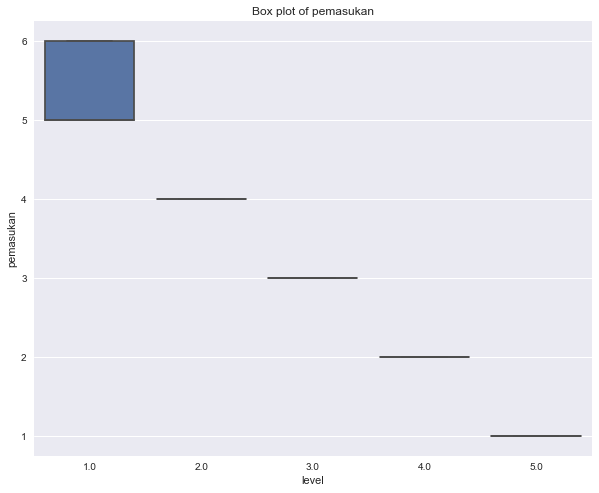

In [40]:
BivariateAnalysisPlot("pemasukan")

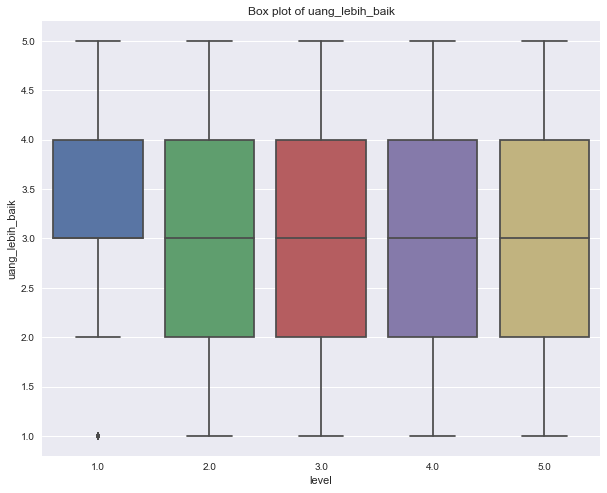

In [41]:
BivariateAnalysisPlot("uang_lebih_baik")

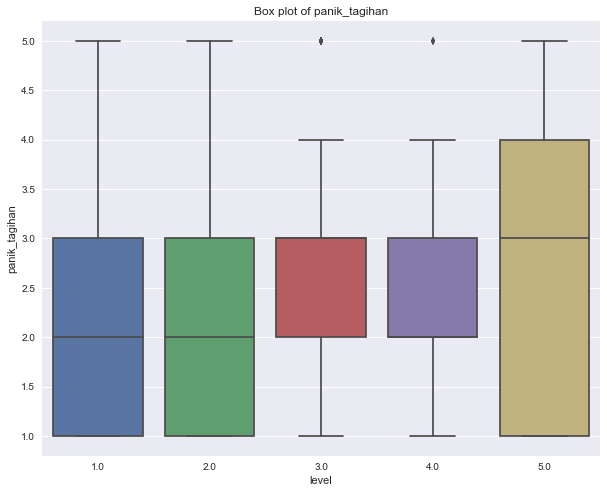

In [42]:
BivariateAnalysisPlot("panik_tagihan")

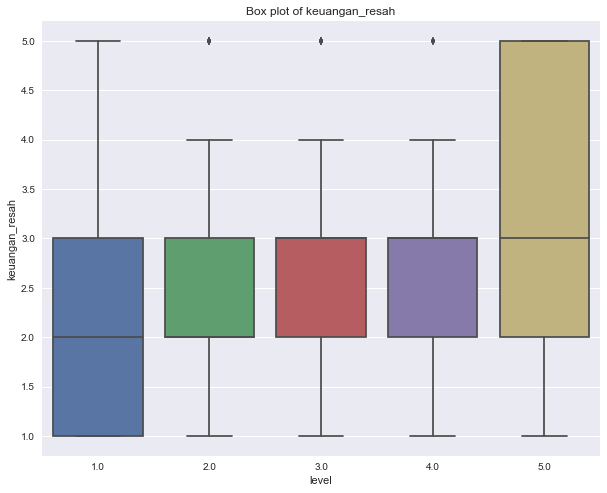

In [43]:
BivariateAnalysisPlot("keuangan_resah")

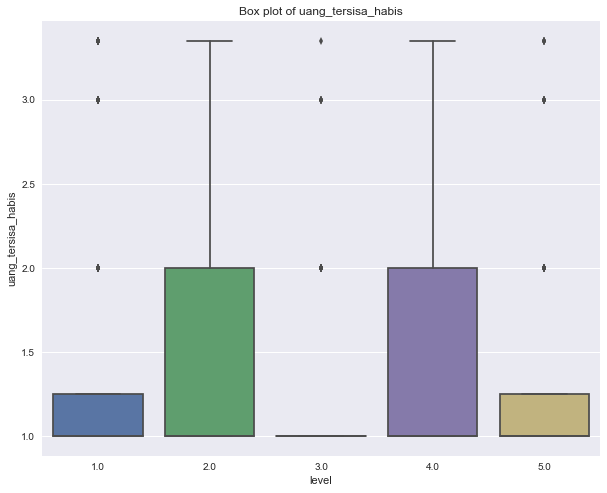

In [44]:
BivariateAnalysisPlot("uang_tersisa_habis")

In [45]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
features = "+".join(data2.columns.difference(["level"]))
features

'keuangan_resah+kuota_Email+kuota_Game+kuota_lain+merk+panik_tagihan+pekerjaan+pemasukan+uang_kuota+uang_lebih_baik+uang_tersisa_habis'

In [46]:
#perform vif

a, b = dmatrices(formula_like= 'level ~ ' + features,data=data2,return_type="dataframe")
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["Features"] = b.columns
vif



,VIF Factor,Features
0,35.177349,Intercept
1,1.393129,keuangan_resah
2,1.084825,kuota_Email
3,1.047106,kuota_Game
4,1.099926,kuota_lain
5,1.007872,merk
6,1.399993,panik_tagihan
7,1.492265,pekerjaan
8,1.807412,pemasukan
9,1.285625,uang_kuota


In [ ]:
#hasil VIF menunjukan tidak ada indikasi multikolinearitas karena nilai VIF kecil
# Cara mendeteksi adanya Multikolinearitas di dalam model regresi adalah dengan cara:

# Melihat kekuatan korelasi antar variabel bebas. Jika ada korelasi antar variabel bebas > 0,8 dapat diindikasikan adanya multikolinearitas.
# Melihat nilai standar error koefisien regresi parsial. Jika ada nilai standar error > 1, maka dapat diindikasikan adanya multikolinearitas.
# Melihat rentang confidence interval. Jika rentang confidence interval sangat lebar, maka dapat diindikasikan adanya multikolinearitas.
# Melihat nilai Condition Index dan eigenvalue. Jika nilai condition index > 30 dan nilai eigenvalue < 0,001 dapat diindikasikan adanya multikolinearitas.
# Melihat nilai Tolerance dan Variance Inflating Factor (VIF). Jika nilai Tolerance < 0,1 dan VIF > 10 dapat diindikasikan adanya multikolinearitas. Sebagian pakar menggunakan batasan Tolerance < 0,2 dan VIF > 5 dalam menentukan adanya multikolinearitas. Para pakar juga lebih banyak menggunakan nilai Tolerance dan VIF dalam menentukan adanya Multikolinearitas di dalam model regresi linear berganda dibandingkan menggunakan parameter-parameter yang lainnya. Hal ini juga dalam prakteknya menggunakan SPSS, kita sudah disuguhkan dengan hasil yang instant, dimana kita bisa langsung lihat nilai keduanya di dalam output SPSS.

# Kapan Bisa Dipertahankan
# Nilai VIF tinggi hanya pada variabel kontrol, sedangkan pada variabel interest, nilai VIF rendah.
# Nilai VIF tinggi yang disebabkan oleh sebab inklusi karena hasil perkalian atau kuadrat di dalam model, namun kedua variabel tersebut berkorelasi kuat terhadap hasil perkaliannya.
# Model regresi dengan variabel dummy dengan jumlah kategori variabel dummy adalah tiga kategori atau lebih.

In [47]:
#Split data into testing and training set
X = data2.drop('level',axis=1)
Y = data2.level
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
X_train.head()

,pemasukan,pekerjaan,uang_kuota,merk,kuota_Game,kuota_Email,kuota_lain,uang_lebih_baik,panik_tagihan,keuangan_resah,uang_tersisa_habis
310,5.0,17.0,2.0,11.0,2.0,2.0,4.0,4.0,4.0,4.0,2.0
542,6.0,16.0,3.0,11.0,2.0,2.0,5.0,5.0,1.0,1.0,1.0
17,1.0,3.0,2.0,9.0,2.0,3.0,3.0,4.0,3.0,3.0,1.0
266,2.0,16.0,1.0,13.0,1.0,2.0,3.0,3.0,1.0,2.0,1.0
318,4.0,10.0,3.0,8.0,1.0,4.0,3.0,4.0,2.0,2.0,1.0


In [48]:
X_train.shape

(571, 11)

In [49]:
X_test.head()

,pemasukan,pekerjaan,uang_kuota,merk,kuota_Game,kuota_Email,kuota_lain,uang_lebih_baik,panik_tagihan,keuangan_resah,uang_tersisa_habis
339,2.0,15.0,3.0,13.0,1.0,2.0,3.0,2.0,4.0,1.0,3.35
142,3.0,15.0,2.0,9.0,1.0,2.0,5.0,1.0,2.0,5.0,1.00
243,5.0,11.0,3.0,10.0,1.0,1.0,4.0,4.0,3.0,3.0,2.00
236,5.0,3.0,2.0,13.0,4.0,1.0,3.0,2.0,3.0,3.0,1.00
712,5.0,13.0,3.0,13.0,1.0,2.0,4.0,2.0,1.0,2.0,1.00


In [50]:
X_test.shape

(143, 11)

In [51]:
round(Y_train.value_counts()/Y_train.shape[0] * 100,3)

1.0    42.382
2.0    19.965
5.0    14.361
3.0    12.609
4.0    10.683
Name: level, dtype: float64

In [52]:
featurecolumns = data2.columns.difference(['level'])
featurecolumns

Index(['keuangan_resah', 'kuota_Email', 'kuota_Game', 'kuota_lain', 'merk',
       'panik_tagihan', 'pekerjaan', 'pemasukan', 'uang_kuota',
       'uang_lebih_baik', 'uang_tersisa_habis'],
      dtype='object')

In [53]:
#Model building
#Logistic Regression
logreg = LogisticRegression(C=1e4)
logreg.fit(X_train,Y_train)

LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [54]:
#Features and coefficients
coefficient_df =  pd.DataFrame({'Features' : pd.Series(featurecolumns),
                        "Coefficients" : pd.Series(logreg.coef_[0])})
coefficient_df

,Features,Coefficients
0,keuangan_resah,16.374314
1,kuota_Email,-0.027120
2,kuota_Game,-0.028622
3,kuota_lain,-0.075165
4,merk,-0.013968
5,panik_tagihan,-0.205588
6,pekerjaan,-0.237197
7,pemasukan,-0.060954
8,uang_kuota,-0.083305
9,uang_lebih_baik,-0.109941


In [55]:
logreg.intercept_

array([-69.85145224,  -1.2714912 ,  -0.97477353,  -0.84399804,
        20.96713313])

In [56]:
#Predicting the test cases
data_test_pred_log = pd.DataFrame({'actual':Y_test, 'predicted': logreg.predict(X_test)})
data_test_pred_log = data_test_pred_log.reset_index()
data_test_pred_log.head()

,index,actual,predicted
0,339,4.0,4.0
1,142,3.0,2.0
2,243,1.0,1.0
3,236,1.0,1.0
4,712,1.0,1.0


In [57]:
#creating a confusion matrix

cm_logreg = metrics.confusion_matrix(data_test_pred_log.actual,data_test_pred_log.predicted,labels = [1,2,3,4,5])
cm_logreg

array([[66,  0,  0,  0,  0],
       [ 0, 27,  6,  0,  0],
       [ 0,  6,  4,  0,  0],
       [ 0,  2,  4,  6,  0],
       [ 0,  0,  0,  0, 22]], dtype=int64)

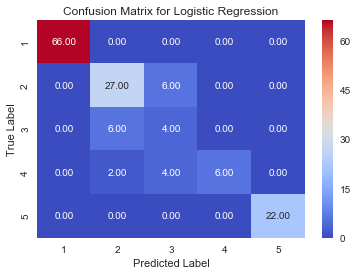

In [58]:
sns.heatmap(cm_logreg,annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels = ["1", "2","3","4","5"] , yticklabels = ["1", "2","3","4","5"])
plt.title("Confusion Matrix for Logistic Regression")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [59]:
#find precision score

prec_score = metrics.precision_score(data_test_pred_log.actual, data_test_pred_log.predicted, average='weighted')
print("Precision score :", round(prec_score,3))

Precision score : 0.897


In [60]:
#find the overall accuracy of model

acc_score = metrics.accuracy_score(data_test_pred_log.actual,data_test_pred_log.predicted)
print("Accuracy of model :", round(acc_score,3))

Accuracy of model : 0.874


In [61]:
data_test_pred_log.actual.value_counts()

1.0    66
2.0    33
5.0    22
4.0    12
3.0    10
Name: actual, dtype: int64

In [62]:
#classification report
print(metrics.classification_report(data_test_pred_log.actual, data_test_pred_log.predicted))

             precision    recall  f1-score   support

        1.0       1.00      1.00      1.00        66
        2.0       0.77      0.82      0.79        33
        3.0       0.29      0.40      0.33        10
        4.0       1.00      0.50      0.67        12
        5.0       1.00      1.00      1.00        22

avg / total       0.90      0.87      0.88       143



In [63]:
#probabilty of prediction

predict_prob_df = pd.DataFrame(logreg.predict_proba(X_test))
predict_prob_df.head()

,0,1,2,3,4
0,1.490599e-18,0.175527,0.324679,0.499662,1.330277e-04
1,5.495241e-11,0.679548,0.204817,0.115635,7.107222e-12
2,7.989961e-01,0.150412,0.036846,0.013746,3.263344e-28
3,8.790020e-01,0.100132,0.015163,0.005703,3.648943e-28
4,7.667118e-01,0.196319,0.022891,0.014079,4.295013e-28


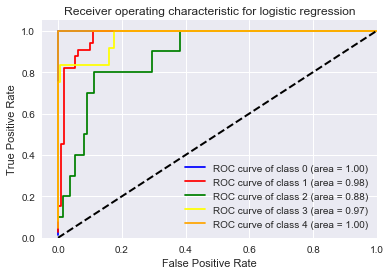

In [64]:
#draw auc roc (Receiver operating characteristic) curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_score = logreg.fit(X_train, Y_train).predict_proba(X_test)
y_test = label_binarize(data_test_pred_log.actual, classes=[1,2,3,4,5])

n_classes = y_test.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green','yellow','orange']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, 
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for logistic regression')
plt.legend(loc="lower right")
plt.show()

In [65]:
#Decision Tree

clf2 = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=14, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')
clf2.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=14, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

In [66]:
#Predicting the test cases
data_test_pred_dtclass = pd.DataFrame({'actual':Y_test, 'predicted': clf2.predict(X_test)})
data_test_pred_dtclass = data_test_pred_dtclass.reset_index()
data_test_pred_dtclass.head()

,index,actual,predicted
0,339,4.0,4.0
1,142,3.0,3.0
2,243,1.0,1.0
3,236,1.0,1.0
4,712,1.0,1.0


In [67]:
#creating a confusion matrix

cm_dtclass = metrics.confusion_matrix(data_test_pred_dtclass.actual,data_test_pred_dtclass.predicted,labels = [1,2,3,4,5])
cm_dtclass

array([[66,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0],
       [ 0,  0,  9,  1,  0],
       [ 0,  0,  0, 10,  2],
       [ 0,  0,  0,  2, 20]], dtype=int64)

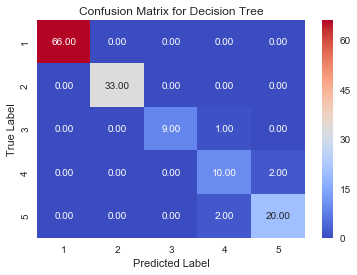

In [68]:
sns.heatmap(cm_dtclass,annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels = ["1", "2","3","4","5"] , yticklabels = ["1", "2","3","4","5"])
plt.title("Confusion Matrix for Decision Tree")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [69]:
#find precision score

prec_score = metrics.precision_score(data_test_pred_dtclass.actual, data_test_pred_dtclass.predicted, average='weighted')
print("Precision score :", round(prec_score,3))

Precision score : 0.967


In [70]:
#find the overall accuracy of model

acc_score = metrics.accuracy_score(data_test_pred_dtclass.actual,data_test_pred_dtclass.predicted)
print("Accuracy of model :", round(acc_score,3))

Accuracy of model : 0.965


In [71]:
data_test_pred_dtclass.actual.value_counts()

1.0    66
2.0    33
5.0    22
4.0    12
3.0    10
Name: actual, dtype: int64

In [72]:
print(metrics.classification_report(data_test_pred_dtclass.actual, data_test_pred_dtclass.predicted))

             precision    recall  f1-score   support

        1.0       1.00      1.00      1.00        66
        2.0       1.00      1.00      1.00        33
        3.0       1.00      0.90      0.95        10
        4.0       0.77      0.83      0.80        12
        5.0       0.91      0.91      0.91        22

avg / total       0.97      0.97      0.97       143



In [73]:
#probabilty of prediction

predict_prob_df = pd.DataFrame(clf2.predict_proba(X_test))
predict_prob_df.head()

,0,1,2,3,4
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


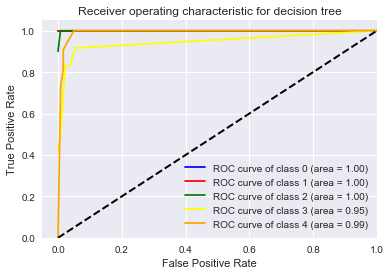

In [74]:
#draw auc roc (Receiver operating characteristic) curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_score = clf2.fit(X_train, Y_train).predict_proba(X_test)
y_test = label_binarize(data_test_pred_dtclass.actual, classes=[1,2,3,4,5])

n_classes = y_test.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green','yellow','orange']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, 
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for decision tree')
plt.legend(loc="lower right")
plt.show()

In [75]:
#SVM
from sklearn import svm
clf3 = svm.SVC(probability=True)
clf3.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [76]:
#Predicting the test cases
data_test_pred_svm = pd.DataFrame({'actual':Y_test, 'predicted': clf3.predict(X_test)})
data_test_pred_svm = data_test_pred_svm.reset_index()
data_test_pred_svm.head()

,index,actual,predicted
0,339,4.0,3.0
1,142,3.0,2.0
2,243,1.0,2.0
3,236,1.0,2.0
4,712,1.0,1.0


In [77]:
#creating a confusion matrix

cm_svm = metrics.confusion_matrix(data_test_pred_svm.actual,data_test_pred_svm.predicted,labels = [1,2,3,4,5])
cm_svm

array([[62,  4,  0,  0,  0],
       [ 4, 28,  1,  0,  0],
       [ 0,  4,  4,  2,  0],
       [ 0,  2,  3,  5,  2],
       [ 0,  0,  0,  2, 20]], dtype=int64)

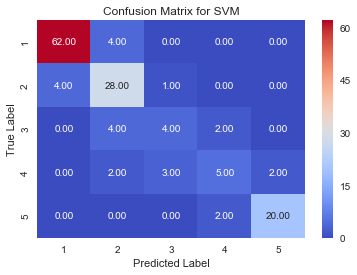

In [78]:
sns.heatmap(cm_svm,annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels = ["1", "2","3","4","5"] , yticklabels = ["1", "2","3","4","5"])
plt.title("Confusion Matrix for SVM")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [79]:
#find precision score

prec_score = metrics.precision_score(data_test_pred_svm.actual, data_test_pred_svm.predicted, average='weighted')
print("Precision score :", round(prec_score,3))

Precision score : 0.825


In [80]:
#find the overall accuracy of model

acc_score = metrics.accuracy_score(data_test_pred_svm.actual,data_test_pred_svm.predicted)
print("Accuracy of model :", round(acc_score,3))

Accuracy of model : 0.832


In [81]:
data_test_pred_svm.actual.value_counts()

1.0    66
2.0    33
5.0    22
4.0    12
3.0    10
Name: actual, dtype: int64

In [82]:
print(metrics.classification_report(data_test_pred_svm.actual, data_test_pred_svm.predicted))

             precision    recall  f1-score   support

        1.0       0.94      0.94      0.94        66
        2.0       0.74      0.85      0.79        33
        3.0       0.50      0.40      0.44        10
        4.0       0.56      0.42      0.48        12
        5.0       0.91      0.91      0.91        22

avg / total       0.83      0.83      0.83       143



In [83]:
#probabilty of prediction

predict_prob_df = pd.DataFrame(clf3.predict_proba(X_test))
predict_prob_df.head()

,0,1,2,3,4
0,0.006396,0.029668,0.444825,0.390019,0.129092
1,0.021167,0.276603,0.313875,0.315788,0.072568
2,0.175602,0.774743,0.037953,0.009374,0.002329
3,0.267669,0.548408,0.124934,0.033891,0.025099
4,0.964722,0.033557,0.001296,0.000306,0.000120


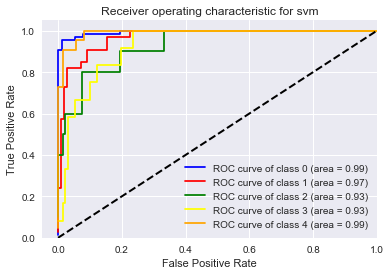

In [84]:
#draw auc roc (Receiver operating characteristic) curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_score = clf3.fit(X_train, Y_train).predict_proba(X_test)
y_test = label_binarize(data_test_pred_svm.actual, classes=[1,2,3,4,5])

n_classes = y_test.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green','yellow','orange']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, 
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for svm')
plt.legend(loc="lower right")
plt.show()

In [85]:
#GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB(priors=None)

In [86]:
#Predicting the test cases
data_test_pred_gnb = pd.DataFrame({'actual':Y_test, 'predicted': gnb.predict(X_test)})
data_test_pred_gnb = data_test_pred_gnb.reset_index()
data_test_pred_gnb.head()

,index,actual,predicted
0,339,4.0,4.0
1,142,3.0,3.0
2,243,1.0,1.0
3,236,1.0,1.0
4,712,1.0,1.0


In [87]:
#creating a confusion matrix
cm_gnb = metrics.confusion_matrix(data_test_pred_gnb.actual,data_test_pred_gnb.predicted,labels = [1,2,3,4,5])
cm_gnb

array([[66,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0],
       [ 0,  0, 10,  0,  0],
       [ 0,  0,  0, 12,  0],
       [ 0,  0,  0,  0, 22]], dtype=int64)

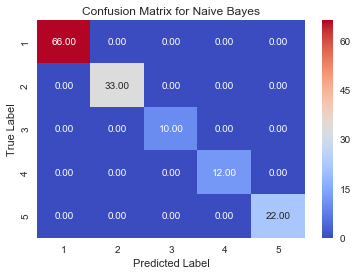

In [88]:
sns.heatmap(cm_gnb,annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels = ["1", "2","3","4","5"] , yticklabels = ["1", "2","3","4","5"])
plt.title("Confusion Matrix for Naive Bayes")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [89]:
#find precision score

prec_score = metrics.precision_score(data_test_pred_gnb.actual, data_test_pred_gnb.predicted, average='weighted')
print("Precision score :", round(prec_score,3))

Precision score : 1.0


In [90]:
#find the overall accuracy of model

acc_score = metrics.accuracy_score(data_test_pred_gnb.actual,data_test_pred_gnb.predicted)
print("Accuracy of model :", round(acc_score,3))

Accuracy of model : 1.0


In [91]:
data_test_pred_gnb.actual.value_counts()

1.0    66
2.0    33
5.0    22
4.0    12
3.0    10
Name: actual, dtype: int64

In [92]:
print(metrics.classification_report(data_test_pred_gnb.actual, data_test_pred_gnb.predicted))

             precision    recall  f1-score   support

        1.0       1.00      1.00      1.00        66
        2.0       1.00      1.00      1.00        33
        3.0       1.00      1.00      1.00        10
        4.0       1.00      1.00      1.00        12
        5.0       1.00      1.00      1.00        22

avg / total       1.00      1.00      1.00       143



In [93]:
#probabilty of prediction

predict_prob_df = pd.DataFrame(gnb.predict_proba(X_test))
predict_prob_df.head()

,0,1,2,3,4
0,2.949843e-14,0.0,0.0,1.0,0.0
1,3.332421e-09,0.0,1.0,0.0,0.0
2,1.000000e+00,0.0,0.0,0.0,0.0
3,1.000000e+00,0.0,0.0,0.0,0.0
4,1.000000e+00,0.0,0.0,0.0,0.0


In [94]:
#find the auc score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(Y_test, Y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(data_test_pred_gnb.actual)
    Y_test = lb.transform(data_test_pred_gnb.actual)
    Y_pred = lb.transform(data_test_pred_gnb.predicted)
    return roc_auc_score(Y_test, Y_pred, average=average)

multiclass_roc_auc_score(data_test_pred_gnb.actual, data_test_pred_gnb.predicted)

1.0

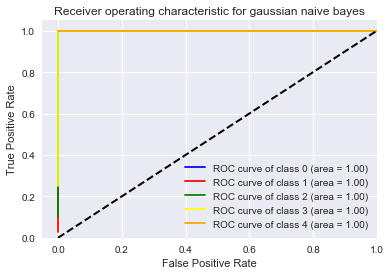

In [95]:
# function plotPredictionScore(label,value,test_data){
    
# }
# function classifyTestData(test_data,class_enum){
    
# }


# y_score = plotPredictionScore(label,value,test_data);
# y_test = classifyTestData(test_data,class_enum);
# plot = new Plot(title);
# y_label = "True Positive Rate"
# x_label = "False Positive Rate"
# x_plot_range = [0,1]
# y_plot_range = x_plot_range
# plot.setAxis([x_score,x_label,x_plot_range],[y_score,y_label,y_plot_range]);

#draw auc roc (Receiver operating characteristic) curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
#hitung skor prediksi algoritma berdasarkan kelasnya
y_score = gnb.fit(X_train, Y_train).predict_proba(X_test)
y_test = label_binarize(data_test_pred_gnb.actual, classes=[1,2,3,4,5])
#plot koordinat kurva berdasarkan rentang kelas
#warnai kurva
#tambahkan label berisi hasil perhitungan 
#area plot diawali pada [0,0] diakhiri pada [1,1]
#limit kurva x di [-0.05, 1.0]
#limit kurva y di [0.0, 1.05]
n_classes = y_test.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green','yellow','orange']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, 
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for gaussian naive bayes')
plt.legend(loc="lower right")
plt.show()

In [97]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import *
from IPython.display import display
import ipywidgets as widgets
plt.style.use('ggplot')


form_item_layout = widgets.Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)


# displaying the text widget
text = widgets.Text(
    placeholder='Nama',
    disabled=False
)
#display(text)
# add button that updates the graph based on the checkboxes
button = widgets.Button(description="Cek Level")
#display(button)
resultLabel = widgets.Label(
    value="",
    disabled = True
)
#display(resultLabel)
pemasukan = widgets.IntSlider(
    value=data2.pemasukan.median(),
    min=data2.pemasukan.min(),
    max=data2.pemasukan.max(),
    step=1,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    slider_color='black'
)
pekerjaan = widgets.IntSlider(
    value=data2.pekerjaan.median(),
    min=data2.pekerjaan.min(),
    max=data2.pekerjaan.max(),
    step=1,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    slider_color='black'
)
uang_kuota = widgets.IntSlider(
    value=data2.uang_kuota.median(),
    min=data2.uang_kuota.min(),
    max=data2.uang_kuota.max(),
    step=1,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    slider_color='black'
)
merk = widgets.IntSlider(
    value=data2.merk.median(),
    min=data2.merk.min(),
    max=data2.merk.max(),
    step=1,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    slider_color='black'
)
kuota_Game = widgets.IntSlider(
    value=data2.kuota_Game.median(),
    min=data2.kuota_Game.min(),
    max=data2.kuota_Game.max(),
    step=1,
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    slider_color='black'
)
kuota_Email =  widgets.IntSlider(
    value=data2.kuota_Email.median(),
    min=data2.kuota_Email.min(),
    max=data2.kuota_Email.max(),
    step=1,
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    slider_color='black'
)
kuota_lain =  widgets.IntSlider(
    value=data2.kuota_lain.median(),
    min=data2.kuota_lain.min(),
    max=data2.kuota_lain.max(),
    step=1,
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    slider_color='black'
)
uang_lebih_baik =  widgets.IntSlider(
    value=data2.uang_lebih_baik.median(),
    min=data2.uang_lebih_baik.min(),
    max=data2.uang_lebih_baik.max(),
    step=1,
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    slider_color='black'
)
panik_tagihan = widgets.IntSlider(
    value=data2.panik_tagihan.median(),
    min=data2.panik_tagihan.min(),
    max=data2.panik_tagihan.max(),
    step=1,
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    slider_color='black'
)

keuangan_resah =  widgets.IntSlider(
    value=data2.keuangan_resah.median(),
    min=data2.keuangan_resah.min(),
    max=data2.keuangan_resah.max(),
    step=1,
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    slider_color='black'
)
uang_tersisa_habis =  widgets.IntSlider(
    value=data2.uang_tersisa_habis.median(),
    min=data2.uang_tersisa_habis.min(),
    max=data2.uang_tersisa_habis.max(),
    step=1,
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    slider_color='black'
)
algos = widgets.Dropdown(options=['Logistic Regression','Decision Tree', 'SVM', 'GaussianNB'])
#display(revolve)

form_items = [
   Box([Label(value='Masukan nama:'), text], layout=form_item_layout),
   Box([Label(value='Pemasukan:'), pemasukan], layout=form_item_layout),
   Box([Label(value='Pekerjaan:'), pekerjaan], layout=form_item_layout),
   Box([Label(value='Uang untuk kuota:'), uang_kuota], layout=form_item_layout),
   Box([Label(value='Merk Handphone:'), merk], layout=form_item_layout),
   Box([Label(value='kuota Game:'), kuota_Game], layout=form_item_layout),
   Box([Label(value='kuota Email:'), kuota_Email], layout=form_item_layout),
   Box([Label(value='kuota lain:'), kuota_lain], layout=form_item_layout),
   Box([Label(value='Apakah anda menghabiskan uang untuk merasa lebih baik?:'), uang_lebih_baik], layout=form_item_layout),
   Box([Label(value='Apakah anda panik setiap menerima tagihan?:'), panik_tagihan], layout=form_item_layout),
   Box([Label(value='Apakah kondisi keuangan anda membuat anda resah?:'), keuangan_resah], layout=form_item_layout),
    Box([Label(value='Apabila saya memiliki uang tersisa, saya harus menghabiskannya:'), uang_tersisa_habis], layout=form_item_layout),
   Box([Label(value='Algoritma:'),algos], layout=form_item_layout),
   button,
   Box([Label(value='Hasil:'), resultLabel], layout=form_item_layout),
]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='dashed 2px',
    align_items='stretch',
    width= '70%'
))

display(form)

# function to deal with the checkbox update button       
def on_button_clicked(b):
    nama = text.value
    pmskn = pemasukan.value
    pkrjn = pekerjaan.value
    kuota = uang_kuota.value
    mrk = merk.value
    kGame = kuota_Game.value
    kEmail = kuota_Email.value
    klain = kuota_lain.value
    ulbaik = uang_lebih_baik.value
    ptagihan = panik_tagihan.value
    kresah = keuangan_resah.value
    uthabis = uang_tersisa_habis.value
    algo = algos.value
    
    testARR = [[pmskn,pkrjn,kuota,mrk,kGame,kEmail,klain,ulbaik,ptagihan,kresah,uthabis]]
    yGuess  = []
    
    if algo == 'Logistic Regression':
        yGuess = logreg.predict(testARR)
    elif   algo == 'Decision Tree':
        yGuess = clf2.predict(testARR)
    elif algo == 'SVM':
        yGuess = clf3.predict(testARR)
    elif algo == 'GaussianNB':
        yGuess = gnb.predict(testARR)
    
    print(nama,pmskn,pkrjn,kuota,mrk,kGame,kEmail,klain,ulbaik,ptagihan,kresah,uthabis,algo,yGuess[0])
    
    if(yGuess[0] == 5):
        resultLabel.value = text.value + ' Resiko Sangat Tinggi. Batas kredit yang diterima sebesar Rp 3.000.000,-.'    
    elif(yGuess[0] == 4):
        resultLabel.value = text.value + ' Resiko Tinggi. Batas kredit yang diterima sebesar Rp 6.000.000,-.'
    elif(yGuess[0] == 3):
        resultLabel.value = text.value + ' Resiko Menengah. Batas kredit yang diterima sebesar Rp 12.000.000,-.'
    elif(yGuess[0] == 2):
        resultLabel.value = text.value + ' Resiko Rendah. Batas kredit yang diterima sebesar Rp 15.000.000,-.'
    elif(yGuess[0] == 1):
        resultLabel.value = text.value + ' Resiko Sangat Rendah. Batas kredit yang diterima sebesar Rp 20.000.000,-.'
    else :
        resultLabel.value = text.value + ' Resiko Tak Teridentifikasi. Batas kredit yang diterima sebesar Rp 0,-.'
        
button.on_click(on_button_clicked)
plt.show()

Box(children=(Box(children=(Label(value='Masukan nama:'), Text(value='', placeholder='Nama')), layout=Layout(d…